In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

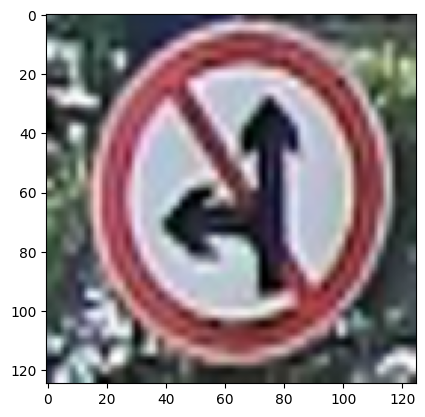

In [2]:
# Read the image
image = cv2.imread('./database2/resized/train/A/A_0000.png')
# image = cv2.resize(image, (300,300), interpolation = cv2.INTER_AREA)
plt.imshow(image[:,:,::-1])
plt.show()

In [3]:
# Convert the image to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

result = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([155,25,0])
upper = np.array([179,255,255])
mask = cv2.inRange(image, lower, upper)
result = cv2.bitwise_and(result, result, mask=mask)

cv2.imshow('mask', mask)
cv2.imshow('result', result)

cv2.waitKey(0)
cv2.destroyAllWindows()

Only C and default locale supported with the posix collation implementation
Only C and default locale supported with the posix collation implementation
Case insensitive sorting unsupported in the posix collation implementation
Numeric mode unsupported in the posix collation implementation
Only C and default locale supported with the posix collation implementation
Only C and default locale supported with the posix collation implementation
Case insensitive sorting unsupported in the posix collation implementation
Numeric mode unsupported in the posix collation implementation


In [4]:
#blurring and smoothin
# img1=cv2.imread('./Mapillary/train/train_0/-1dYvHaY52PTrihdjPDPQg.jpg',1)
img1 = cv2.imread('./database2/resized/train/A/A_0000.png')
img1=cv2.resize(img1, [int(s/10) for s in img1.shape[:2]])

hsv = cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)

#lower red
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])


#upper red
lower_red2 = np.array([170,50,50])
upper_red2 = np.array([180,255,255])

mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(img1,img1, mask= mask)


mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
res2 = cv2.bitwise_and(img1,img1, mask= mask2)

img3 = res+res2
img4 = cv2.add(res,res2)
img5 = cv2.addWeighted(res,0.5,res2,0.5,0)


kernel = np.ones((15,15),np.float32)/225
smoothed = cv2.filter2D(res,-1,kernel)
smoothed2 = cv2.filter2D(img3,-1,kernel)





cv2.imshow('Original',img1)
# cv2.imshow('Averaging',smoothed)
# cv2.imshow('mask',mask)
# cv2.imshow('res',res)
# cv2.imshow('mask2',mask2)
# cv2.imshow('res2',res2)
# cv2.imshow('res3',img3)
cv2.imshow('res4',img4)
cv2.imshow('res5',img5)
# cv2.imshow('smooth2',smoothed2)




cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Read the transformed image where red regions are white and the rest is black
image = img5

# Ensure the image is in the right format (8-bit single-channel)
if image.ndim == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image if needed
_, thresholded = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

# Find contours in the image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    # Check if the contour has at least 5 points
    if len(contour) >= 5:
        # Fit an ellipse to the contour
        ellipse = cv2.fitEllipse(contour)

        # Draw the ellipse on the original image (assuming you have the original color image)
        cv2.ellipse(img1, ellipse, (0, 255, 0), 2)

# Display the result
cv2.imshow('Ellipses Fitted to Red Areas', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()